In [1]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Decision tree plot
import pydotplus
from IPython.display import Image


#matplotlib for plotting

import scikitplot as skplt 

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split #Data split function
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


from collections import Counter

Using TensorFlow backend.


In [2]:
data = pd.read_csv('SES2FF.csv')
pd.set_option('display.max_columns', 999)
data.head()

,name,orig_name,imdb_id,views,revenue,premiere,premiere_year,completion_year,director,d_gender,production_country,genre,length,budget,total_support,production_support,development_support,script_support,catalog_support,dist_support,international_support,copy_support,other_support,imdb_link,elonet
0,Titanic,Titanic,tt0120338,1114954.0,7728955.71,16/01/1998,1998,1997,James Cameron,m,US,"Drama, Romance",194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0120338/,https://elonet.finna.fi/Record/kavi.elonet_elo...
1,Tuntematon sotilas,Tuntematon sotilas,tt4065552,1023391.0,14188838.11,27/10/2017,2017,2017,Aku Louhimies,m,FI,"Drama, War",180,6500000.0,980000.0,940000.0,30000.0,10000.0,NaN,119300.0,18240.0,NaN,NaN,https://www.imdb.com/title/tt4065552/,https://elonet.finna.fi/Record/kavi.elonet_elo...
2,Yksi lensi yli käenpesän,One Flew Over the Cuckoo's Nest,tt0073486,821736.0,52000.18,19/03/1976,1976,1975,Milos Forman,m,US,Drama,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0073486/,https://elonet.finna.fi/Record/kavi.elonet_elo...
3,Papillon,Papillon,tt0070511,759301.0,12076.74,25/01/1974,1974,1973,Franklin J. Schaffner,m,US,"Biography, Crime, Drama",151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0070511/,https://elonet.finna.fi/Record/kavi.elonet_elo...
4,E.T. the extra-terrestrial,E.T. the Extra-Terrestrial,tt0083866,715297.0,252773.46,17/12/1982,1982,1982,Steven Spielberg,m,US,"Family, Sci-Fi",115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,867.2,NaN,https://www.imdb.com/title/tt0083866/,https://elonet.finna.fi/Record/kavi.elonet_elo...


In [3]:
#data.drop(['imdb_idlink','completion_year','orig_name','huom1','huom2','Unnamed: 28'] , axis=1, inplace=True)

In [4]:
profit = data['revenue']>data['budget']
data['profit'] = profit
data.head()

,name,orig_name,imdb_id,views,revenue,premiere,premiere_year,completion_year,director,d_gender,production_country,genre,length,budget,total_support,production_support,development_support,script_support,catalog_support,dist_support,international_support,copy_support,other_support,imdb_link,elonet,profit
0,Titanic,Titanic,tt0120338,1114954.0,7728955.71,16/01/1998,1998,1997,James Cameron,m,US,"Drama, Romance",194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0120338/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False
1,Tuntematon sotilas,Tuntematon sotilas,tt4065552,1023391.0,14188838.11,27/10/2017,2017,2017,Aku Louhimies,m,FI,"Drama, War",180,6500000.0,980000.0,940000.0,30000.0,10000.0,NaN,119300.0,18240.0,NaN,NaN,https://www.imdb.com/title/tt4065552/,https://elonet.finna.fi/Record/kavi.elonet_elo...,True
2,Yksi lensi yli käenpesän,One Flew Over the Cuckoo's Nest,tt0073486,821736.0,52000.18,19/03/1976,1976,1975,Milos Forman,m,US,Drama,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0073486/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False
3,Papillon,Papillon,tt0070511,759301.0,12076.74,25/01/1974,1974,1973,Franklin J. Schaffner,m,US,"Biography, Crime, Drama",151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0070511/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False
4,E.T. the extra-terrestrial,E.T. the Extra-Terrestrial,tt0083866,715297.0,252773.46,17/12/1982,1982,1982,Steven Spielberg,m,US,"Family, Sci-Fi",115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,867.2,NaN,https://www.imdb.com/title/tt0083866/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False


In [5]:
data["premiere"]=data['premiere'].str[3:5]
data["premiere"]=data['premiere'].astype(int)
data.head()

,name,orig_name,imdb_id,views,revenue,premiere,premiere_year,completion_year,director,d_gender,production_country,genre,length,budget,total_support,production_support,development_support,script_support,catalog_support,dist_support,international_support,copy_support,other_support,imdb_link,elonet,profit
0,Titanic,Titanic,tt0120338,1114954.0,7728955.71,1,1998,1997,James Cameron,m,US,"Drama, Romance",194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0120338/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False
1,Tuntematon sotilas,Tuntematon sotilas,tt4065552,1023391.0,14188838.11,10,2017,2017,Aku Louhimies,m,FI,"Drama, War",180,6500000.0,980000.0,940000.0,30000.0,10000.0,NaN,119300.0,18240.0,NaN,NaN,https://www.imdb.com/title/tt4065552/,https://elonet.finna.fi/Record/kavi.elonet_elo...,True
2,Yksi lensi yli käenpesän,One Flew Over the Cuckoo's Nest,tt0073486,821736.0,52000.18,3,1976,1975,Milos Forman,m,US,Drama,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0073486/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False
3,Papillon,Papillon,tt0070511,759301.0,12076.74,1,1974,1973,Franklin J. Schaffner,m,US,"Biography, Crime, Drama",151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.imdb.com/title/tt0070511/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False
4,E.T. the extra-terrestrial,E.T. the Extra-Terrestrial,tt0083866,715297.0,252773.46,12,1982,1982,Steven Spielberg,m,US,"Family, Sci-Fi",115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,867.2,NaN,https://www.imdb.com/title/tt0083866/,https://elonet.finna.fi/Record/kavi.elonet_elo...,False


In [6]:
data.keys()


Index(['name', 'orig_name', 'imdb_id', 'views', 'revenue', 'premiere',
       'premiere_year', 'completion_year', 'director', 'd_gender',
       'production_country', 'genre', 'length', 'budget', 'total_support',
       'production_support', 'development_support', 'script_support',
       'catalog_support', 'dist_support', 'international_support',
       'copy_support', 'other_support', 'imdb_link', 'elonet', 'profit'],
      dtype='object')

In [7]:
x11 = data['revenue']
x12 =data['production_country']
x1 = pd.concat([x11, x12], axis=1)

In [8]:
x21 = data['revenue']
x22 =data['international_support']
x23 = data['profit']
x24= data['production_country']
x2 = pd.concat([x21, x22, x23, x24], axis=1)

In [9]:
x2.head()

,revenue,international_support,profit,production_country
0,7728955.71,NaN,False,US
1,14188838.11,18240.0,True,FI
2,52000.18,NaN,False,US
3,12076.74,NaN,False,US
4,252773.46,NaN,False,US


In [10]:
x2 = x2.dropna()

In [11]:
x2.head()

,revenue,international_support,profit,production_country
1,14188838.11,18240.00,True,FI
6,557.54,3955.78,False,FI
12,4070570.56,36160.40,False,FI
14,4413675.00,747.00,True,FI
17,7143.79,11773.15,False,FI


In [12]:
cleanup_nums = {"production_country": {"FI": 0}}
x2.replace(cleanup_nums, inplace=True)
x2.production_country = x2.production_country.apply(lambda x: 1 if x != 0 else 0)
#x2["A"] = pd.to_numeric(df["A"], downcast="float")
x2.head()

,revenue,international_support,profit,production_country
1,14188838.11,18240.00,True,0
6,557.54,3955.78,False,0
12,4070570.56,36160.40,False,0
14,4413675.00,747.00,True,0
17,7143.79,11773.15,False,0


In [13]:
x2

,revenue,international_support,profit,production_country
1,14188838.11,18240.00,True,0
6,557.54,3955.78,False,0
12,4070570.56,36160.40,False,0
14,4413675.00,747.00,True,0
17,7143.79,11773.15,False,0
...,...,...,...,...
7080,268.23,26765.42,False,0
7092,78.21,512.97,False,0
7095,146.33,4255.15,False,0
7097,148.00,5973.00,False,0


In [14]:
x2.corr()

,revenue,international_support,profit,production_country
revenue,1.000000,0.079174,0.557157,-0.011434
international_support,0.079174,1.000000,0.033499,0.127678
profit,0.557157,0.033499,1.000000,-0.082650
production_country,-0.011434,0.127678,-0.082650,1.000000


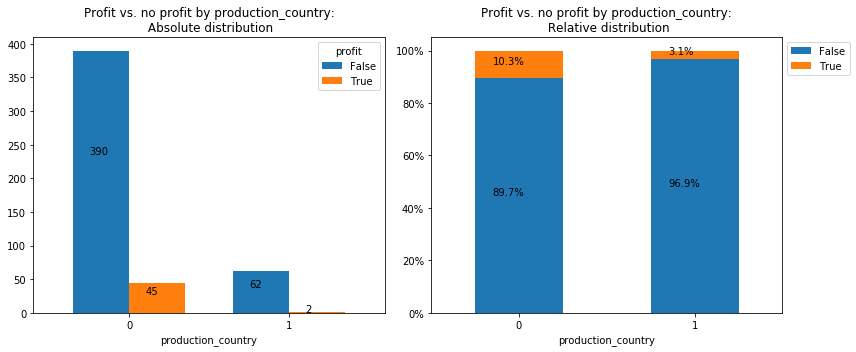

In [15]:
#profit by production country
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = x2.groupby(['production_country','profit'])['profit'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Profit vs. no profit by production_country:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = x2.groupby(['production_country','profit'])['profit'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Profit vs. no profit by production_country:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()